# Analisis de datos climáticos, estación Universidad Nacional(Temperatura diaria 2021-2024)

## Introducción:
En este cuaderno se documenta paso a paso el analisis de una serie temporal de datos climáticos tomados desde una estación hidrológica de la universidad Nacional, en este caso estudiaremos como se comporta la temperatura desde el 31 de marzo del 2021 hasta el 31 de marzo del 2024, los datos fueron tomados hora por hora desde la fecha dada.



## Objetivos 
El objetivo principal en primer lugar es hacer un analisis descriptivo de la serie de tiempo, estudiando sus diferentes componentes y posteriormente poder evaluar si es posible predecir la serie con un modelo estadístico.
## (Aquí van fundamentos teóricos)
#############################################################################


## Metodología
    
    
### Análisis descriptivo: 
Comenzamos con un análisis descriptivo de la serie de tiempo. Esto implica calcular estadísticas resumidas como la media, la mediana, la desviación estándar, y los percentiles. También trazaremos histogramas para examinar la distribución de los datos.

### Visualización de la serie de tiempo:
Realizaremos gráficos de la serie de tiempo para visualizar cómo la temperatura ha cambiado a lo largo del tiempo. Posteriormente trazar la serie de tiempo completa o zooms en períodos específicos para identificar patrones a diferentes escalas de tiempo.

### Análisis de tendencias: 
Examinamos si hay alguna tendencia a largo plazo en la serie de tiempo. Si es necesario, se utilizarán métodos como el suavizado exponencial o regresiones lineales para identificar y cuantificar las tendencias.

### Análisis estacional: 
Analizaremos los componentes estacionales de la serie de tiempo. Esto implica descomponer la serie de tiempo en componentes de tendencia, estacionales y residuales, y examinar los patrones estacionales.

### Detección de outliers: 
Identificamos valores atípicos o outliers en la serie de tiempo que puedan indicar eventos inusuales o anomalías en los datos.

### Análisis de autocorrelación: 
Utilizando la función de autocorrelación examinaremos si hay dependencias temporales en los datos y si los valores pasados de la serie de tiempo pueden predecir los valores futuros.

### Análisis de estacionariedad: 
Una serie de tiempo estacionaria es aquella cuyas propiedades estadísticas, como la media y la varianza, son constantes en el tiempo. Esto facilita el modelado y la predicción.

Si la serie de tiempo no es estacionaria, es necesario diferenciarla para eliminar cualquier tendencia o estacionalidad presente. La diferenciación implica calcular las diferencias entre los valores sucesivos de la serie de tiempo para hacerla estacionaria.
### Modelado y pronóstico: 
Para pronosticar la temperatura futura, construiremos modelos de series temporales como ARIMA (Autoregressive Integrated Moving Average) o modelos de suavizado exponencial. Luego, evaluaremos la precisión de loss pronósticos utilizando técnicas de validación cruzada.


## Preparación de los datos
En primer lugar se leen los datos correspondientes y se trata de visualizar (En primera instancia el formato temporal es mm/dd/aa h/m/s/ (pm/am))

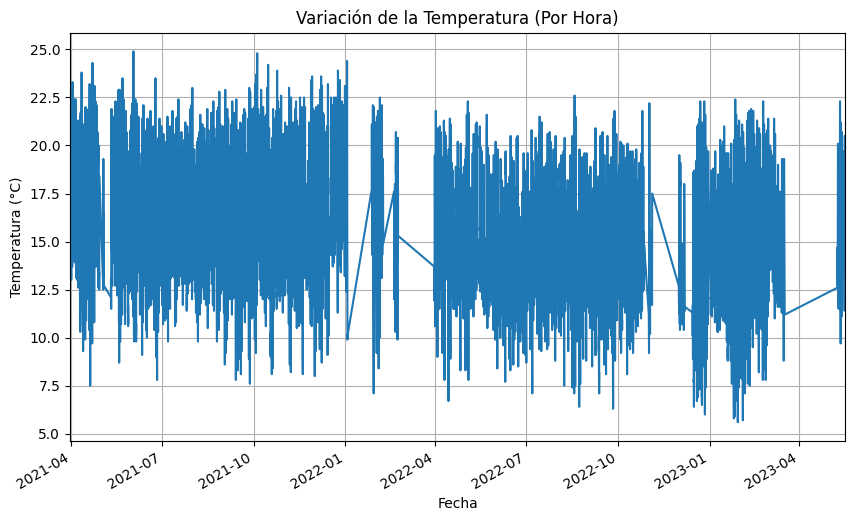

count    13086.000000
mean        15.130514
std          3.209065
min          5.600000
25%         12.800000
50%         14.700000
75%         17.500000
max         24.900000
Name: ValorObservado, dtype: float64
float64
0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
df = pd.read_csv('datos/UNAL2021-2024.csv')

# Convertir la columna de fechas a formato de fecha y hora
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')

# Establecer la columna de fechas como el índice del DataFrame
df.set_index('FechaObservacion', inplace=True)

# Visualizar los datos de temperatura a lo largo del tiempo excluyendo el año 2021
plt.figure(figsize=(10, 6))
df['ValorObservado'].plot()
plt.title('Variación de la Temperatura (Por Hora)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)

# Extender el eje x
plt.xlim(df.index.min(), df.index.max())

plt.show()

# Explorar la distribución de los datos de temperatura excluyendo el año 2021
print(df['ValorObservado'].describe())
print(df['ValorObservado'].dtype)
print(df['ValorObservado'].isnull().sum())



Como los datos son un poco ilegibles ahora mismo tomando los datos por hora, entonces resamplearemos la serie para obtener datos diarios y hacer un analisis más sencillo.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer los datos
df = pd.read_csv('datos/UNAL2021-2024.csv')

# Convertir la columna de fechas a formato de fecha y hora
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')

# Establecer la columna de fechas como el índice del DataFrame
df.set_index('FechaObservacion', inplace=True)

# Tomar la columna de ValorObservado respecto a FechaObservacion
df_estudio = df['ValorObservado']

# Resamplear los datos para que sean diarios y calcular la media diaria
df_diario = df_estudio.resample('D').mean()

df_diario



FechaObservacion
2021-03-31    16.979167
2021-04-01    17.408333
2021-04-02    17.037500
2021-04-03    17.200000
2021-04-04    17.179167
                ...    
2023-05-12    15.283333
2023-05-13    15.941667
2023-05-14    16.300000
2023-05-15    16.141667
2023-05-16    15.856250
Freq: D, Name: ValorObservado, Length: 777, dtype: float64

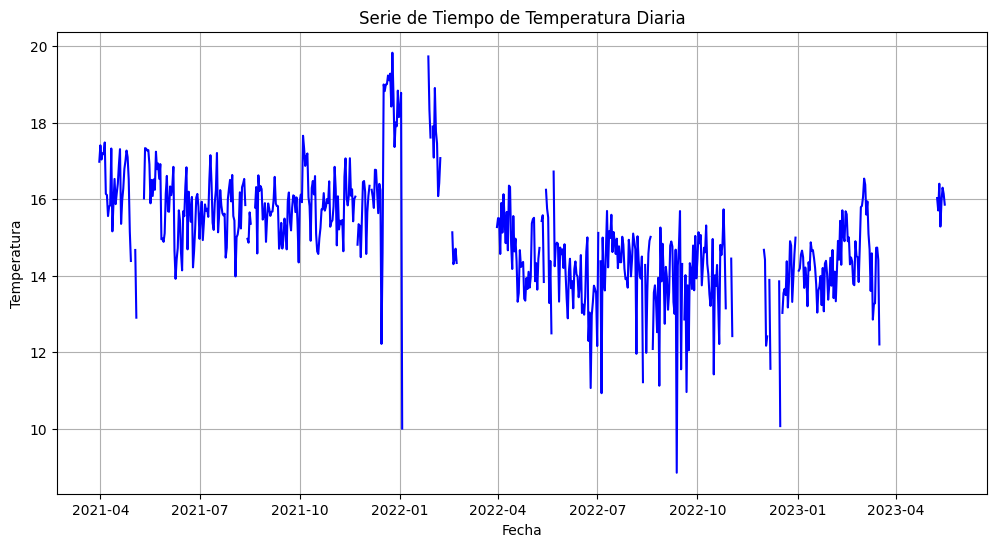

In [41]:
# Mostrar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_diario.index, df_diario.values, color='blue')
plt.title('Serie de Tiempo de Temperatura Diaria')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()


Ya con el nuevo dataframe de nuestros datos y la nueva serie de tiempo, podemos observar que hay algunos huecos, por lo tanto, usando tecnicas de interpolación los rellenaremos para proceder a analizar todo adecuadamente.

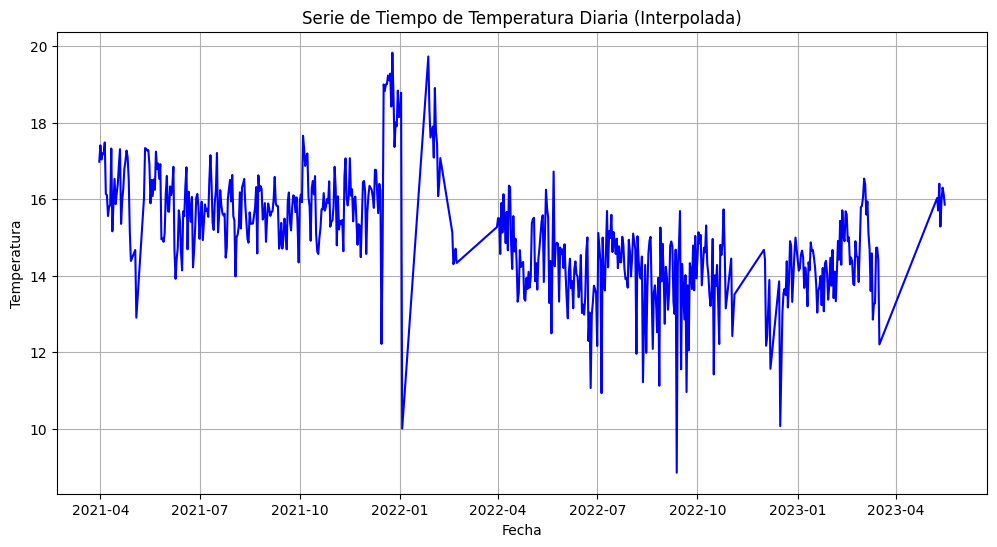

In [42]:
# Interpolar los valores faltantes
df_diario_interpolated = df_diario.interpolate(method='linear')

# Mostrar la serie de tiempo corregida
plt.figure(figsize=(12, 6))
plt.plot(df_diario_interpolated.index, df_diario_interpolated.values, color='blue')
plt.title('Serie de Tiempo de Temperatura Diaria (Interpolada)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()


## Análisis descriptivo:
Primero, calculemos algunas estadísticas resumidas de la serie de tiempo, como la media, la mediana y la desviación estándar. Y a continuación trazamos también un histograma para visualizar la distribución de los datos.

count    777.000000
mean      14.926132
std        1.462582
min        8.844444
25%       14.050000
50%       14.845833
75%       15.820833
max       19.830769
Name: ValorObservado, dtype: float64


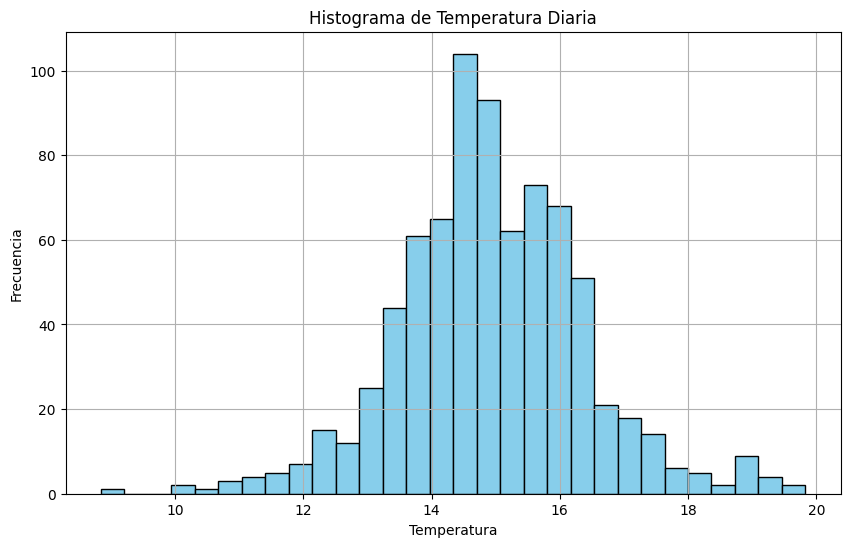

In [43]:
# Estadísticas resumidas
summary_stats = df_diario_interpolated.describe()
print(summary_stats)

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df_diario_interpolated.values, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Temperatura Diaria')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


## La visualización de la serie de tiempo
En esta fase, trazaremos la serie de tiempo de temperatura diaria para tener una comprensión visual de cómo varía la temperatura a lo largo del tiempo. Esto nos ayudará a identificar cualquier tendencia, estacionalidad o patrón en los datos.

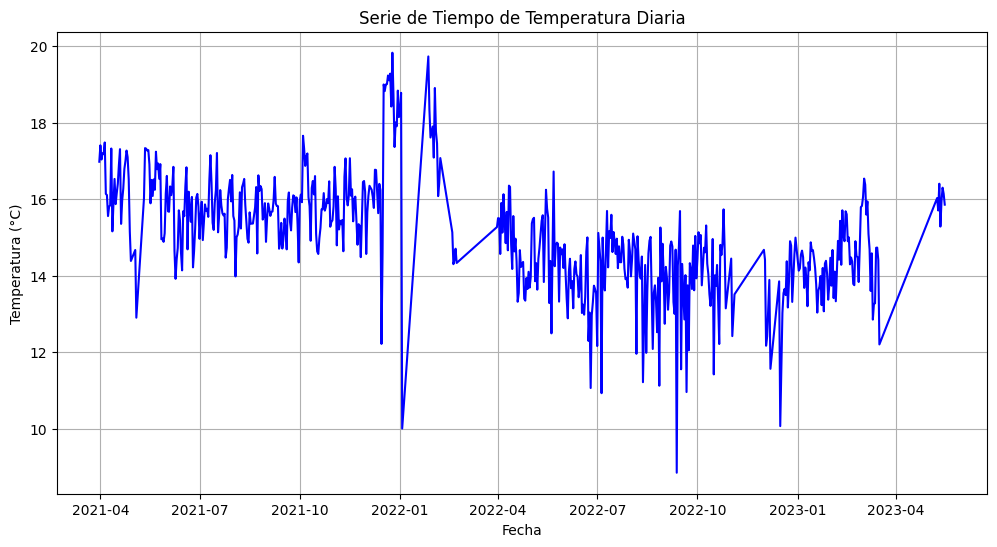

In [44]:
# Mostrar la serie de tiempo de temperatura diaria
plt.figure(figsize=(12, 6))
plt.plot(df_diario_interpolated.index, df_diario_interpolated.values, color='blue')
plt.title('Serie de Tiempo de Temperatura Diaria')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


## Analisis de Tendencias
Como podemos observar, es dificil encontrar una estacionalidad o patrones de tendencia en la serie, los datos son un poco complicados.\
Una forma común de identificar tendencias es mediante el suavizado exponencial o mediante modelos de regresión lineal. En este caso, utilizaré una regresión lineal simple para estimar la tendencia en los datos.

Voy a ajustar una línea de regresión a los datos y trazarla junto con la serie de tiempo original para ver si hay alguna tendencia evidente.

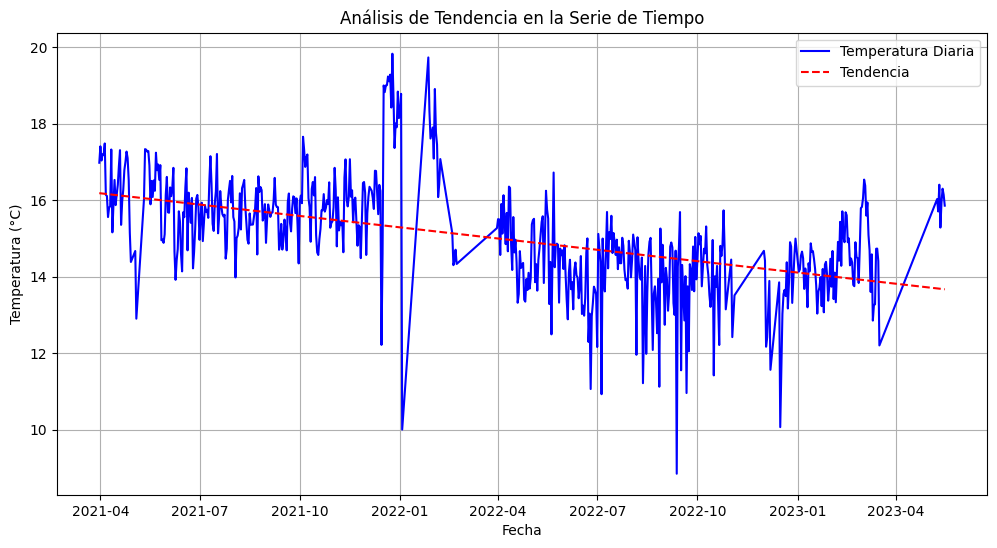

In [49]:
from sklearn.linear_model import LinearRegression

# Ajustar una regresión lineal a los datos
X = pd.to_numeric((df_diario_interpolated.index - df_diario_interpolated.index[0]).days).values.reshape(-1, 1)
y = df_diario_interpolated.values
regressor = LinearRegression()
regressor.fit(X, y)

# Predecir los valores de la tendencia
trend_values = regressor.predict(X)

# Mostrar la serie de tiempo y la tendencia estimada
plt.figure(figsize=(12, 6))
plt.plot(df_diario_interpolated.index, df_diario_interpolated.values, color='blue', label='Temperatura Diaria')
plt.plot(df_diario_interpolated.index, trend_values, color='red', linestyle='--', label='Tendencia')
plt.title('Análisis de Tendencia en la Serie de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


### Resumen
Se observó una tendencia lineal negativa, indicando una disminución en la temperatura a lo largo del tiempo. Esta tendencia podría estar influenciada por factores locales y estacionales. Se destaca la importancia de considerar otras variables y realizar análisis adicionales para obtener una comprensión completa de las tendencias climáticas.

## Analisis de Estacionalidad
El análisis de estacionalidad nos ayudará a identificar patrones repetitivos o cíclicos en la serie de tiempo que ocurren a intervalos regulares, como estaciones del año, meses o días de la semana. Esto puede proporcionar información valiosa sobre cómo la temperatura varía de manera predecible a lo largo del tiempo.

Una forma común de realizar este análisis es descomponer la serie de tiempo en sus componentes de tendencia, estacionalidad y residuales


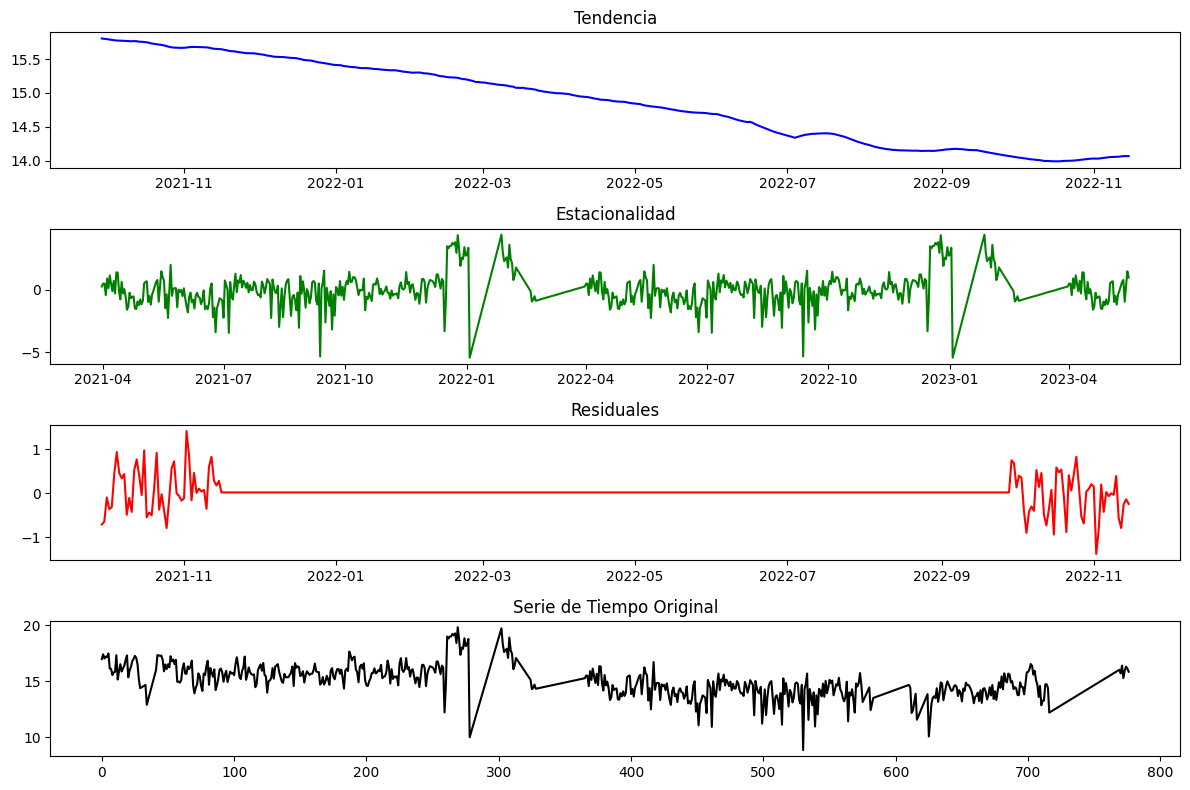

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo en sus componentes
decomposition = seasonal_decompose(df_diario_interpolated, model='additive', period=365)

# Visualizar los componentes
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, color='blue')
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, color='green')
plt.title('Estacionalidad')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, color='red')
plt.title('Residuales')

plt.subplot(4, 1, 4)
plt.plot(df_diario_interpolated.values, color='black')
plt.title('Serie de Tiempo Original')

plt.tight_layout()
plt.show()


### Aclaraciones del analisis de Estacionalidad


#### Tendencia:
La primera gráfica muestra la tendencia de la serie de tiempo. La tendencia representa la dirección general en la que se mueve la serie de tiempo a lo largo del tiempo, ignorando las fluctuaciones de corto plazo y la variabilidad estacional. En esta gráfica, observamos cómo la temperatura cambia a lo largo del tiempo, mostrando si hay una tendencia al alza, a la baja o si permanece relativamente constante.
#### Estacionalidad:
La segunda gráfica muestra la componente estacional de la serie de tiempo. La estacionalidad representa patrones recurrentes que se repiten a intervalos regulares, como estaciones del año, meses o días de la semana. Esta gráfica nos permite identificar patrones estacionales en la temperatura, como variaciones estacionales consistentes que ocurren año tras año.

#### Residuales:
La tercera gráfica muestra los residuales, que son las fluctuaciones aleatorias o no sistemáticas que quedan una vez que se han eliminado la tendencia y la estacionalidad de la serie de tiempo. Estos residuales representan la variabilidad no explicada por la tendencia y la estacionalidad, y pueden contener información sobre la aleatoriedad o el ruido en los datos.

#### Serie de Tiempo Original:
La cuarta gráfica muestra la serie de tiempo original, que es la serie de temperatura diaria sin descomponer en sus componentes. Esta gráfica sirve como referencia para comparar con las otras tres gráficas y entender cómo se relacionan la tendencia, la estacionalidad y los residuales con la serie de tiempo original.

## El análisis de autocorrelación
El análisis de autocorrelación nos ayudará a entender si hay alguna relación entre los valores pasados y futuros de la temperatura en la serie de tiempo. Esto nos permitirá identificar si hay algún patrón repetitivo en los datos que se repite a lo largo del tiempo.

Utilizaremos la función de autocorrelación para calcular las correlaciones entre los valores de temperatura en diferentes momentos en el tiempo. Luego, visualizaremos estas correlaciones en un gráfico de autocorrelación para identificar cualquier patrón significativo.

<Figure size 1000x600 with 0 Axes>

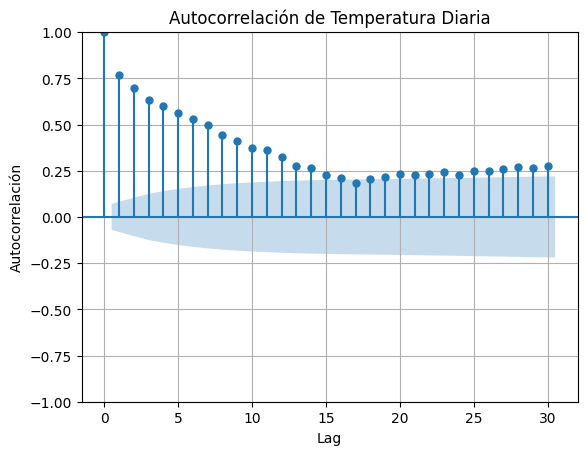

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

# Calcular y visualizar la autocorrelación
plt.figure(figsize=(10, 6))
plot_acf(df_diario_interpolated, lags=30, alpha=0.05)
plt.title('Autocorrelación de Temperatura Diaria')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()


### Aclaraciones del analísis de Autocorrelación


En la gráfica de autocorrelación se observan los siguientes patrones:\

1) En el lag 0, la autocorrelación es 1, ya que la serie de tiempo está perfectamente correlacionada consigo misma en el mismo punto de tiempo.

2) Luego, la autocorrelación disminuye gradualmente a medida que avanzamos en los lags. Esto significa que los valores de temperatura en momentos sucesivos en el tiempo tienen una correlación menor entre sí, lo que sugiere que no hay una fuerte dependencia temporal a largo plazo en los datos.

3) En el lag 15, observas un pico en la autocorrelación que se nivela con el área sombreada en la parte positiva. Este pico indica que hay una correlación significativa entre los valores de temperatura separados por 15 días. Esto sugiere que puede haber un patrón repetitivo en los datos que se repite cada 15 días.

4) La autocorrelación sigue siendo significativa hasta el lag 30, lo que indica que hay una correlación persistente en los datos hasta ese punto en el tiempo.

En resumen, la gráfica de autocorrelación nos proporciona información sobre la dependencia temporal en la serie de tiempo de temperatura diaria, identificando cualquier patrón repetitivo o cíclico que pueda estar presente en los datos.

## Analisis de Estacionariedad
Comencemos verificando la estacionariedad de la serie de tiempo. Hay varias formas de hacerlo, una de las más comunes es mediante la prueba de Dickey-Fuller aumentada (ADF, por sus siglas en inglés), que es una prueba estadística utilizada para determinar si una serie de tiempo es estacionaria o no.

Si la serie de tiempo no es estacionaria, es necesario diferenciarla para eliminar cualquier tendencia o estacionalidad presente. La diferenciación implica calcular las diferencias entre los valores sucesivos de la serie de tiempo para hacerla estacionaria.

In [52]:
from statsmodels.tsa.stattools import adfuller

# Función para realizar la prueba de Dickey-Fuller aumentada
def prueba_adf(serie):
    resultado_adf = adfuller(serie)
    print('Estadística ADF:', resultado_adf[0])
    print('Valor p:', resultado_adf[1])
    print('Valores críticos:')
    for key, value in resultado_adf[4].items():
        print(f'\t{key}: {value}')

# Realizar la prueba de Dickey-Fuller aumentada en la serie de tiempo
prueba_adf(df_diario_interpolated)


Estadística ADF: -3.600308761146309
Valor p: 0.005755127643693266
Valores críticos:
	1%: -3.4390179167598367
	5%: -2.8653655786032237
	10%: -2.5688071343462777


La estadística de la prueba ADF es -3.6003 y el valor p asociado es aproximadamente 0.0058. Comparando el valor p con un nivel de significancia común, como 0.05, observamos que el valor p es menor que 0.05.

Además, los valores críticos dados para niveles de confianza del 1%, 5% y 10% son -3.4390, -2.8654 y -2.5688 respectivamente.

Dado que el valor p es menor que 0.05 y la estadística ADF es menor que el valor crítico del 1%, podemos rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria (no estacionaria). Por lo tanto, concluimos que la serie de tiempo es estacionaria.

Esto significa que no es necesario diferenciar la serie de tiempo para hacerla estacionaria antes de ajustar un modelo ARIMA. Podemos proceder directamente con el ajuste del modelo ARIMA y la realización de predicciones.

## Modelado y Predicción 
Dado que hemos realizado el análisis exploratorio de la serie de tiempo y hemos identificado patrones como la tendencia, estacionalidad y autocorrelación, ahora podemos avanzar hacia el modelado y la predicción de la temperatura futura.

Una forma común de modelar series de tiempo es utilizar modelos autorregresivos integrados de media móvil (ARIMA). Este modelo puede capturar la estructura de la serie de tiempo, incluida la tendencia, la estacionalidad y la autocorrelación.

### Preliminares


#### Modelo ARIMA (Autoregressive Integrated Moving Average):

El modelo ARIMA es un modelo estadístico utilizado para analizar y predecir series de tiempo. Consiste en tres componentes principales: autorregresión (AR), integración (I) y media móvil (MA).

1) Autorregresión (AR):
La parte autorregresiva del modelo (AR) modela la relación lineal entre los valores pasados y el valor actual de la serie de tiempo. El parámetro p representa el orden de la parte autorregresiva y especifica cuántos términos autorregresivos se incluyen en el modelo. Un valor de p mayor indica una dependencia más larga en el pasado.

2) Integración (I):
La parte de integración (I) se refiere al grado de diferenciación necesario para hacer estacionaria la serie de tiempo. La diferenciación implica calcular las diferencias entre los valores sucesivos de la serie de tiempo para eliminar cualquier tendencia o estacionalidad. El parámetro d representa el orden de la diferenciación. Si la serie de tiempo ya es estacionaria, d será 0.

3) Media Móvil (MA):
La parte de media móvil (MA) modela la relación lineal entre el valor actual de la serie de tiempo y los errores pasados de predicción. El parámetro q representa el orden de la parte de media móvil y especifica cuántos términos de media móvil se incluyen en el modelo. Un valor de q mayor indica una dependencia más larga en los errores pasados.

#### Selección de los valores p, d y q:

La selección adecuada de los valores p, d y q es crucial para obtener un buen ajuste del modelo ARIMA y hacer predicciones precisas. Aquí hay algunos enfoques comunes para seleccionar estos valores:

1) Análisis de autocorrelación y autocorrelación parcial:
    Observa los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) de la serie de tiempo para identificar cualquier patrón significativo en los lags. Los picos significativos en la ACF y la PACF pueden ayudarte a seleccionar los valores de p y q, respectivamente.

1) Búsqueda automatizada:
    Utiliza métodos de búsqueda automatizada, como la búsqueda en cuadrícula o la optimización bayesiana, para encontrar los valores óptimos de p, d y q que minimicen una métrica de evaluación, como el error cuadrático medio (MSE), en un conjunto de datos de entrenamiento.

2) Pruebas estadísticas:
    Realiza pruebas estadísticas, como la prueba de Dickey-Fuller aumentada (ADF), para verificar la estacionariedad de la serie de tiempo y determinar si se necesita diferenciación (d) para hacerla estacionaria.

3) Experiencia y conocimiento del dominio:
    Utiliza tu experiencia y conocimiento del dominio para seleccionar valores razonables para p, d y q que reflejen la naturaleza de los datos y los patrones observados en la serie de tiempo.

### Decisiones para aplicar el modelo


Como hemos visto en el analisis exploratorio de la serie, nos podemos dar cuenta que un valor p inicial adecuado para el modelo puede ser p= 15 por el analisis de autocorrelación (aunque hace falta evaluar la autocorrelación parcial par poder tomar una decisión adecuada), luego, como la serie es estacionaria podemos tomar d = 0 y ahora solo resta evaluar q, q indica la relación de tiempo en la dependencia de los errores pasados para el ajuste del modelo


#### Selección de p y q:
Generaremos un gráfico de la PACF (función de autocorrelación parcial ) para la serie de tiempo. Los lags significativos en la PACF pueden ayudarnos a determinar el valor adecuado para el parámetro q en el modelo ARIMA.


<Figure size 1200x600 with 0 Axes>

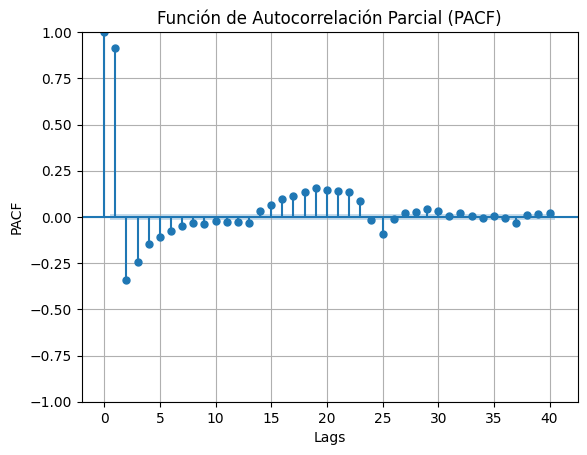

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Trama de la función de autocorrelación parcial (PACF)
def plot_pacf_series(serie, lags=40):
    plt.figure(figsize=(12, 6))
    plot_pacf(serie, lags=lags)
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.title('Función de Autocorrelación Parcial (PACF)')
    plt.grid(True)
    plt.show()

# Llamar a la función para trazar la PACF de la serie de tiempo
plot_pacf_series(df['ValorObservado'])


Dado este patrón en la PACF, podríamos considerar diferentes enfoques para seleccionar el valor adecuado para el parámetro q en el modelo ARIMA. Algunas opciones podrían incluir:

Considerar los lags donde los coeficientes de la PACF son significativamente diferentes de cero y seleccionar q en función de esos lags.
Probar con valores de q en el rango que abarca los cambios notables en la PACF y evaluar cómo se comporta el modelo ARIMA con esos valores de q.

En este caso probaremos valores de q en el rango de 1 a 5 para p y q y veremos cómo se comportan las predicciones del modelo ARIMA en un conjunto de datos de validación utilizando métricas de evaluación como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

### Aplicación del modelo
Tomaremos los siguientes valores para nuestro modelo ARIMA d=0 y p y q entre 1 y 5.

In [54]:
import itertools
#En este código observamos las combinaciones posibles de algunos parametros
# Rangos para los parámetros p, d, y q
p_values = range(1, 6)  # Valores de p de 1 a 5
d_values = [0]  # d siempre será 0
q_values = range(1, 6)  # Valores de q de 1 a 5

# Generar todas las combinaciones de p, d, y q
parameter_combinations = list(itertools.product(p_values, d_values, q_values))

# Mostrar las combinaciones generadas
for i, params in enumerate(parameter_combinations, 1):
    print(f"Combinación {i}: p={params[0]}, d={params[1]}, q={params[2]}")


Combinación 1: p=1, d=0, q=1
Combinación 2: p=1, d=0, q=2
Combinación 3: p=1, d=0, q=3
Combinación 4: p=1, d=0, q=4
Combinación 5: p=1, d=0, q=5
Combinación 6: p=2, d=0, q=1
Combinación 7: p=2, d=0, q=2
Combinación 8: p=2, d=0, q=3
Combinación 9: p=2, d=0, q=4
Combinación 10: p=2, d=0, q=5
Combinación 11: p=3, d=0, q=1
Combinación 12: p=3, d=0, q=2
Combinación 13: p=3, d=0, q=3
Combinación 14: p=3, d=0, q=4
Combinación 15: p=3, d=0, q=5
Combinación 16: p=4, d=0, q=1
Combinación 17: p=4, d=0, q=2
Combinación 18: p=4, d=0, q=3
Combinación 19: p=4, d=0, q=4
Combinación 20: p=4, d=0, q=5
Combinación 21: p=5, d=0, q=1
Combinación 22: p=5, d=0, q=2
Combinación 23: p=5, d=0, q=3
Combinación 24: p=5, d=0, q=4
Combinación 25: p=5, d=0, q=5


#### Paso a Paso para el ajuste de Modelos ARIMA:
1) Dividir tus datos de serie temporal en conjuntos de entrenamiento y prueba.
2) Para cada combinación de parámetros p, d, y q:\
    a. Ajustar un modelo ARIMA en el conjunto de entrenamiento.\
    b. Realizar predicciones en el conjunto de prueba.\
    c. Evaluar el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) o el error absoluto medio (MAE).
    Seleccionar el modelo ARIMA con el mejor rendimiento basado en las métricas de evaluación.

#### Dividir los datos de la serie de tiempo en conjuntos de Entrenamiento y Prueba

##### Definir el punto de división: 
Decidimos en qué punto se desea dividir los datos en conjuntos de entrenamiento y prueba. Esto podría ser un punto específico en el tiempo (por ejemplo, el último año de datos se usa como conjunto de prueba) o un porcentaje de los datos totales (por ejemplo, el 80% de los datos se usa como conjunto de entrenamiento y el 20% restante como conjunto de prueba).
##### Dividir los datos: 
Utilizamos el punto de división definido para separar los datos en conjuntos de entrenamiento y prueba. Asegurándonos de que los datos en el conjunto de prueba sean posteriores a los datos en el conjunto de entrenamiento para mantener el orden cronológico.

In [58]:
# Importar la librería necesaria
import pandas as pd

# Supongamos que df_diario_interpolated es tu DataFrame

# Definir el porcentaje de datos para usar en el conjunto de entrenamiento
train_percent = 0.8  # Usaremos el 80% de los datos como conjunto de entrenamiento

# Calcular el índice para dividir los datos
split_index = int(len(df_diario_interpolated) * train_percent)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = df_diario_interpolated.iloc[:split_index]
test_data = df_diario_interpolated.iloc[split_index:]

# Verificar la longitud de los conjuntos de entrenamiento y prueba
print("Longitud del conjunto de entrenamiento:", len(train_data))
print("Longitud del conjunto de prueba:", len(test_data))



Longitud del conjunto de entrenamiento: 621
Longitud del conjunto de prueba: 156


FechaObservacion
2021-03-31    16.979167
2021-04-01    17.408333
2021-04-02    17.037500
2021-04-03    17.200000
2021-04-04    17.179167
                ...    
2022-12-07    11.562500
2022-12-08    11.848437
2022-12-09    12.134375
2022-12-10    12.420312
2022-12-11    12.706250
Freq: D, Name: ValorObservado, Length: 621, dtype: float64

Este código divide df_diario_interpolated en conjuntos de entrenamiento y prueba de acuerdo con el porcentaje especificado. El 80% de los datos se usarán como conjunto de entrenamiento y el 20% restante como conjunto de prueba.

#### Ajustar los modelos ARIMA correspondientes al conjunto de entrenamiento
1) Ajuste de modelos ARIMA: Para cada combinación de parámetros p, d, y q que hemos generado, ajustaremos un modelo ARIMA en el conjunto de entrenamiento.

2) Predicciones: Utilizaremos cada modelo ARIMA ajustado para hacer predicciones en el conjunto de prueba.

3) Evaluación del rendimiento: Calcularemos métricas de evaluación, como el error cuadrático medio (MSE) o el error absoluto medio (MAE), para cada conjunto de predicciones y los compararemos para determinar cuál modelo ARIMA tiene el mejor rendimiento en el conjunto de prueba.

4) Selección del mejor modelo: Seleccionaremos el modelo ARIMA con el mejor rendimiento en el conjunto de prueba como nuestro modelo final.

5) Predicciones futuras: Una vez seleccionado el mejor modelo ARIMA, podemos utilizarlo para hacer predicciones futuras en nuestra serie temporal.\
El siguiente código ajustará un modelo ARIMA para cada combinación de parámetros p, d, y q, hará predicciones en el conjunto de prueba y calculará el error cuadrático medio (MSE) para cada modelo. Luego, los resultados se ordenarán por MSE y se mostrarán en orden ascendente.

Mejores parámetros (p, d, q): (5, 0, 3)
Mejor error cuadrático medio (MSE): 1.2007801597258823
Mejor error absoluto medio (MAE): 0.8588113456584028


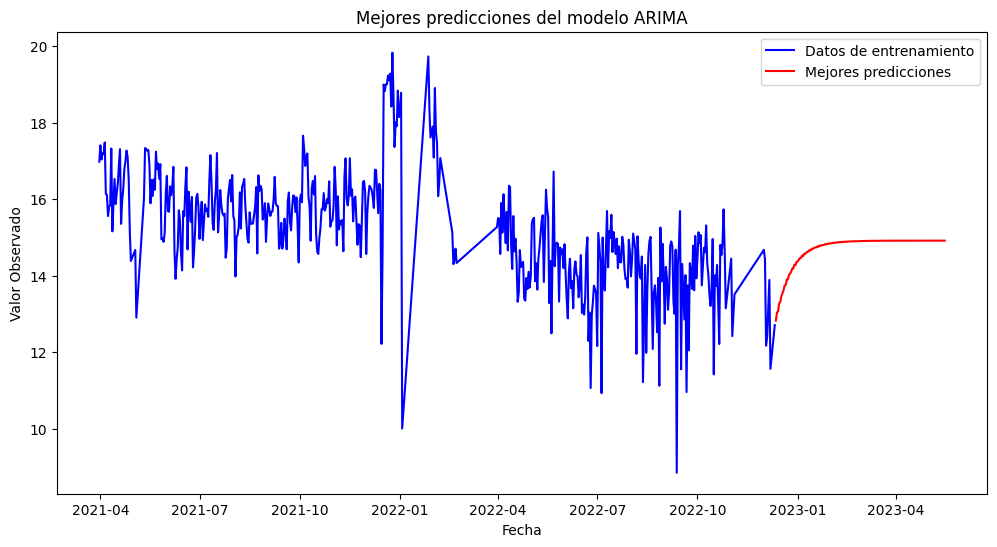

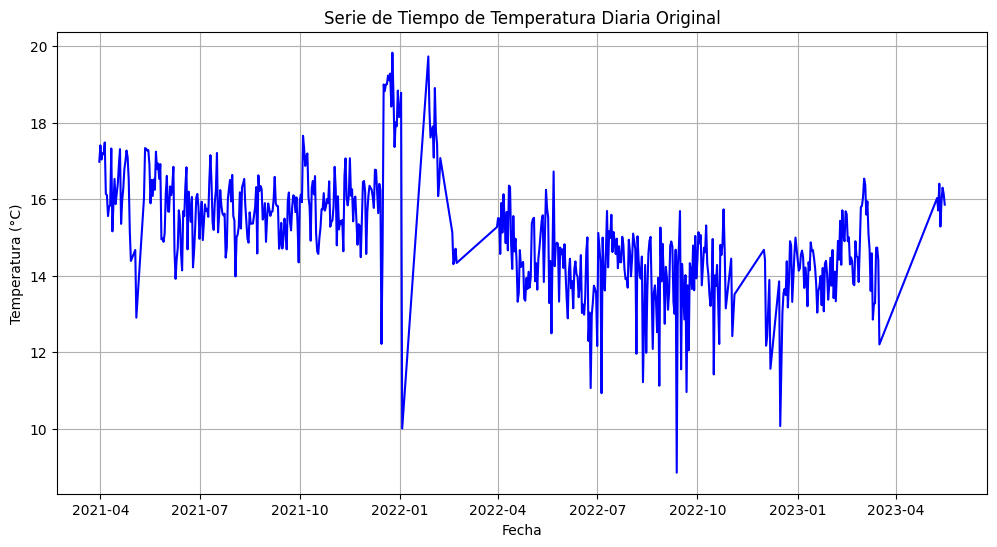

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en entrenamiento y prueba
train_data = df_diario_interpolated.iloc[:int(len(df_diario_interpolated)*0.8)]
test_data = df_diario_interpolated.iloc[int(len(df_diario_interpolated)*0.8):]

# Definir las combinaciones posibles de p, d y q
combinations = [(p, d, q) for p in range(1, 6) for d in range(2) for q in range(1, 6)]

# Inicializar variables para almacenar las métricas de evaluación
best_mse = float('inf')
best_mae = float('inf')
best_params = None
best_predictions = None

# Iterar sobre las combinaciones posibles
for p, d, q in combinations:
    try:
        # Ajustar el modelo ARIMA
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()

        # Predicciones del modelo
        predictions = model_fit.forecast(steps=len(test_data))

        # Calcular métricas de evaluación
        mse = mean_squared_error(test_data, predictions)
        mae = mean_absolute_error(test_data, predictions)

        # Actualizar las mejores métricas y parámetros si corresponde
        if mse < best_mse and mae < best_mae:
            best_mse = mse
            best_mae = mae
            best_params = (p, d, q)
            best_predictions = predictions

    except:
        continue

# Mostrar las mejores métricas y parámetros
print("Mejores parámetros (p, d, q):", best_params)
print("Mejor error cuadrático medio (MSE):", best_mse)
print("Mejor error absoluto medio (MAE):", best_mae)

# Visualizar las series de tiempo originales y las mejores predicciones
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Datos de entrenamiento', color='blue')
plt.plot(test_data.index, best_predictions, label='Mejores predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Valor Observado')
plt.title('Mejores predicciones del modelo ARIMA')
plt.legend()
plt.show()
# Mostrar la serie de tiempo de temperatura diaria
plt.figure(figsize=(12, 6))
plt.plot(df_diario_interpolated.index, df_diario_interpolated.values, color='blue')
plt.title('Serie de Tiempo de Temperatura Diaria Original')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

Ahora toca tomar este ARIMA y predecir lo que sigue con él